In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Cilj nam je da integralimo, numericki, jednacinu prenosa zracenja i da od 
# tabulisanih vrednosti opticke dubine i funkcije izvora dobijemo izlazni intenzitet

# U procesu cemo dobiti i intenzitet svuda u atmosferi, na datom pravcu. 

In [3]:
# Zadajmo neko tau i S 

# Prirodna skala optickih dubina (zbog hidrostaticke ravnoteze, 
# odnosno eksponencijalne stratifikacije) je log scala
logtau = np.linspace(-6,2,81)
tau = 10.0**logtau
print(tau)

[1.00000000e-06 1.25892541e-06 1.58489319e-06 1.99526231e-06
 2.51188643e-06 3.16227766e-06 3.98107171e-06 5.01187234e-06
 6.30957344e-06 7.94328235e-06 1.00000000e-05 1.25892541e-05
 1.58489319e-05 1.99526231e-05 2.51188643e-05 3.16227766e-05
 3.98107171e-05 5.01187234e-05 6.30957344e-05 7.94328235e-05
 1.00000000e-04 1.25892541e-04 1.58489319e-04 1.99526231e-04
 2.51188643e-04 3.16227766e-04 3.98107171e-04 5.01187234e-04
 6.30957344e-04 7.94328235e-04 1.00000000e-03 1.25892541e-03
 1.58489319e-03 1.99526231e-03 2.51188643e-03 3.16227766e-03
 3.98107171e-03 5.01187234e-03 6.30957344e-03 7.94328235e-03
 1.00000000e-02 1.25892541e-02 1.58489319e-02 1.99526231e-02
 2.51188643e-02 3.16227766e-02 3.98107171e-02 5.01187234e-02
 6.30957344e-02 7.94328235e-02 1.00000000e-01 1.25892541e-01
 1.58489319e-01 1.99526231e-01 2.51188643e-01 3.16227766e-01
 3.98107171e-01 5.01187234e-01 6.30957344e-01 7.94328235e-01
 1.00000000e+00 1.25892541e+00 1.58489319e+00 1.99526231e+00
 2.51188643e+00 3.162277

In [4]:
# Linearna zavisnost S od tau u stvari nema mnogo smisla oko ovako velikog
# raspona tau. Pa cemo reci da S zavisi linearno od log tau 

In [5]:
S = 8 + logtau # u nekim jedinicama

Text(0, 0.5, 'Funkcija izvora')

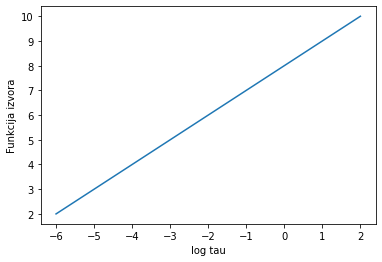

In [7]:
plt.plot(logtau, S)
plt.xlabel("log tau")
plt.ylabel("Funkcija izvora")

In [14]:
# Shema za numericku integraciju:

def solve_rte(S, tau, mu):
    
    ND = len(S)
    
    I = np.zeros(ND)
    # postavimo donji granicni uslov. Pogledaj u knjizi detaljnije, ali ok 
    # aproksimacija je da je: 
    I[ND-1] = S[ND-1]
    
    for i in range(ND-2,-1,-1):
        
        delta = (tau[i+1] - tau[i]) / mu
        
        w_i = 1.0 - 1./delta + np.exp(-delta)/delta
        w_ip = 1./delta - np.exp(-delta)/delta - np.exp(-delta)
        
        if (delta<1E-2):
            w_i = delta/2.0
            w_ip = delta/2.0 - delta**2.0/2.0
            
        I[i] = I[i+1] * np.exp(-delta) + w_i * S[i] + w_ip * S[i+1]
        
    return I

In [15]:
I = solve_rte(S,tau,1.0)

In [16]:
I

array([ 7.74740337,  7.74740484,  7.74740667,  7.74740892,  7.74741171,
        7.74741516,  7.74741941,  7.74742467,  7.74743115,  7.74743915,
        7.74744902,  7.74746118,  7.74747617,  7.74749462,  7.74751734,
        7.74754529,  7.74757966,  7.7476219 ,  7.74767378,  7.74773746,
        7.74781556,  7.74791131,  7.74802859,  7.74817215,  7.74834771,
        7.74856224,  7.74882414,  7.74914359,  7.74953281,  7.75000655,
        7.75058249,  7.75128184,  7.75212991,  7.75315692,  7.75439878,
        7.75589804,  7.75770497,  7.75987874,  7.7624887 ,  7.76561578,
        7.76935394,  7.77381174,  7.77911378,  7.78540218,  7.79283782,
        7.80160134,  7.81189374,  7.82393338,  7.83796206,  7.85423729,
        7.87303103,  7.89462534,  7.91930666,  7.94735862,  7.97905352,
        8.01464274,  8.05434656,  8.09834383,  8.14676246,  8.19967139,
        8.25707493,  8.31891025,  8.38504828,  8.45529852,  8.52941711,
        8.6071178 ,  8.68808482,  8.77198641,  8.85848798,  8.94

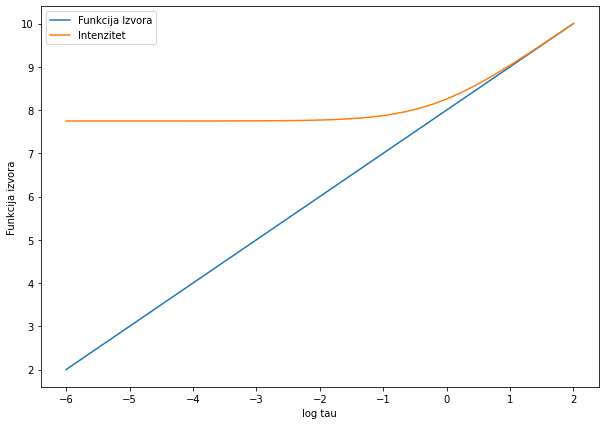

In [18]:
plt.figure(figsize=[10,7])
plt.plot(logtau, S, label='Funkcija Izvora')
plt.plot(logtau, I, label='Intenzitet')
plt.xlabel("log tau")
plt.ylabel("Funkcija izvora")
plt.legend()

In [20]:
# Ok da ovom sada malo detaljnije ispitamo, izvucicemo jedan model 
# sunca iz fajla i isplotovacemo tau, S, i izracunati I
# onda cemo izracunati I za razlicite mu pa cemo videti kako se I 
# menja sa mu i dubinu

In [21]:
atmos = np.loadtxt("falc_71.dat",unpack=True,skiprows=1)

In [22]:
atmos.shape

(12, 71)

In [23]:
# 12 su parametri
# 71 su dubine
# Parametri imaju sledece znacenje: 
# 0 - log tau u kontinuumu
# 1 - visina u cm 
# 2 - temperatura u K 
# 3 - pritisak gasa u dyn/cm^2 
# 4 - pritisak elektrona u dyn/cm^2 
# 5 - nemam pojma nije ni bitno (mozda gustina)
# 6 - isto to 
# 7 - magnetno polje nije vazno, nula je 
# 8 - mikroturbulentna brzina - trebace nam kada budemo radili linije
# 9 - radijalna brzina, nula je ali moze isto da bude vazna za linije 
# 10 - inklinacija magnetnog polja - nije bitn osada 
# 11 - azimuth magnetnog polja - nije bitan sada 

# Nama trebau samo tau i T, pretpostavicemo da je tau dato na talasnoj duzini 500 nm
# pa cemo izracunati funkciju izvora iz temperature na toj tal. duzini, koriscenjem 
# plankovog zakona

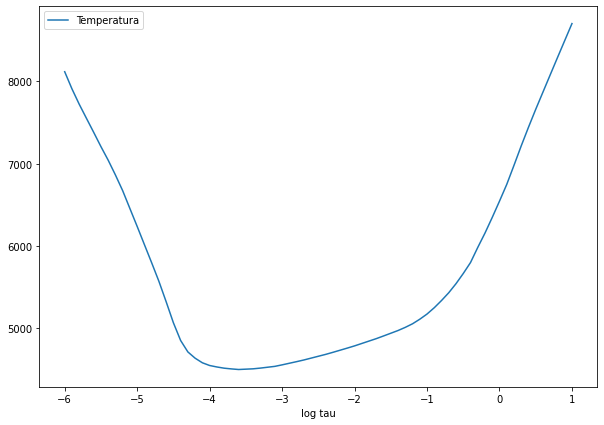

In [27]:
plt.figure(figsize=[10,7])
plt.plot(atmos[0], atmos[2], label='Temperatura')
plt.xlabel("log tau")
plt.legend()

In [24]:
def planck(ll, T):
    
    h = 6.6266E-27
    k = 1.38E-16
    c = 2.997E10 # ovo je sve u CGS sistemu
    
    B = 2*h*c**2.0 / ll**5.0 * 1./(np.exp(h*c/ll/k/T) - 1.0)
    
    return B



In [25]:
S = planck(500E-7, atmos[2])

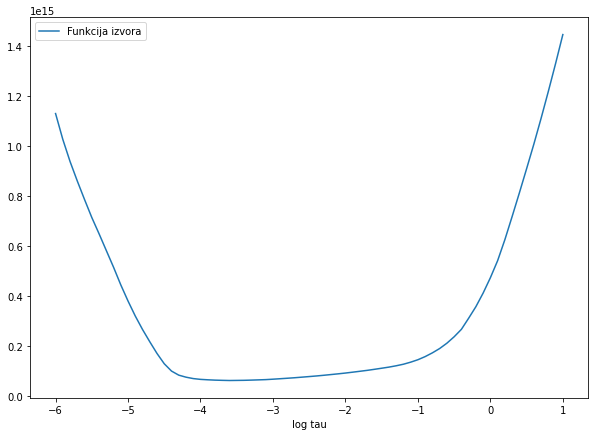

In [28]:
plt.figure(figsize=[10,7])
plt.plot(atmos[0], S, label='Funkcija izvora')
plt.xlabel("log tau")
plt.legend()

In [29]:
# Hajde ovo da integralimo:
I = solve_rte(S, 10.0**atmos[0],1.0)

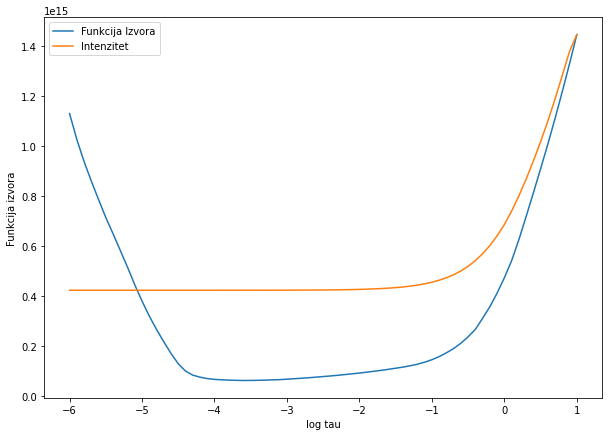

In [30]:
logtau = atmos[0]

plt.figure(figsize=[10,7])
plt.plot(logtau, S, label='Funkcija Izvora')
plt.plot(logtau, I, label='Intenzitet')
plt.xlabel("log tau")
plt.ylabel("Funkcija izvora")
plt.legend()

In [31]:
# A sta bi bilo, ako bismo zamilili da se sve ovo desava na nekoj talasnoj duzini
# koja je recimo 1000 puta neprozirnija nego ova nasa?

In [34]:
I = solve_rte(S, 100000.*10.0**atmos[0],1.0)

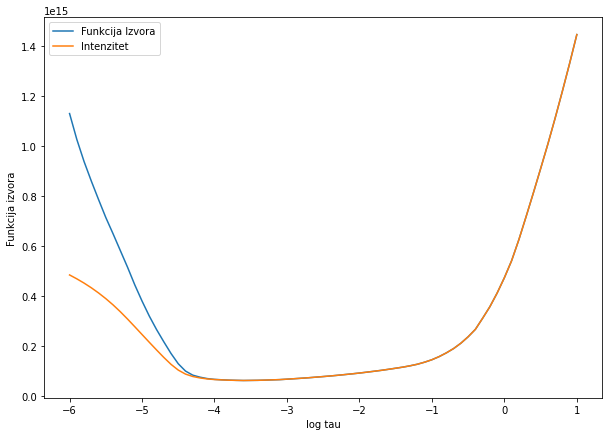

In [35]:
plt.figure(figsize=[10,7])
plt.plot(logtau, S, label='Funkcija Izvora')
plt.plot(logtau, I, label='Intenzitet')
plt.xlabel("log tau")
plt.ylabel("Funkcija izvora")
plt.legend()

In [38]:
# poslednja stvar, a sta sa zavisnoscu od mu? 

# pa hajde da ovo resimo za neki grid vrednosti mu

mu = np.linspace(0.1,1.0,10)
full_int = np.zeros([10,len(S)])

In [42]:
for m in range(0,10):
    full_int[m] = solve_rte(S,100000*10.0**logtau,mu[m])

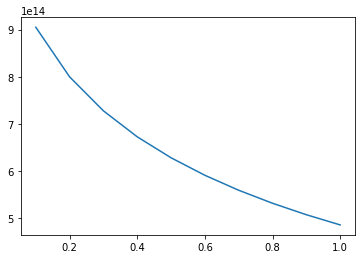

In [43]:
plt.plot(mu, full_int[:,0])

In [ ]:
# ovo bi bio tzv limb brightening 